# **HUM ANALYSIS**

## Setting a DatetimeIndex Frequency
Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [ ]:
############ UPLOAD THE DATASET #################
# Reding the co2 dataset
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_url = 'https://raw.githubusercontent.com/puldavid87/Timeseries/main/dataset/sensor_data_hourly.csv'
df= pd.read_csv(data_url, index_col='Time',parse_dates=True, sep=',')
#https://otexts.com/fpp2/estimation-and-model-selection.html


In [ ]:

df.index

DatetimeIndex(['2022-04-12 11:00:00', '2022-04-12 12:00:00',
               '2022-04-12 13:00:00', '2022-04-12 14:00:00',
               '2022-04-12 15:00:00', '2022-04-12 16:00:00',
               '2022-04-12 17:00:00', '2022-04-12 18:00:00',
               '2022-04-12 19:00:00', '2022-04-12 20:00:00',
               ...
               '2022-08-29 14:00:00', '2022-08-29 15:00:00',
               '2022-08-29 16:00:00', '2022-08-29 17:00:00',
               '2022-08-29 18:00:00', '2022-08-29 19:00:00',
               '2022-08-29 20:00:00', '2022-08-29 21:00:00',
               '2022-08-29 22:00:00', '2022-08-29 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=3349, freq=None)

In [ ]:
df.index.freq = 'H'
df.index

DatetimeIndex(['2022-04-12 11:00:00', '2022-04-12 12:00:00',
               '2022-04-12 13:00:00', '2022-04-12 14:00:00',
               '2022-04-12 15:00:00', '2022-04-12 16:00:00',
               '2022-04-12 17:00:00', '2022-04-12 18:00:00',
               '2022-04-12 19:00:00', '2022-04-12 20:00:00',
               ...
               '2022-08-29 14:00:00', '2022-08-29 15:00:00',
               '2022-08-29 16:00:00', '2022-08-29 17:00:00',
               '2022-08-29 18:00:00', '2022-08-29 19:00:00',
               '2022-08-29 20:00:00', '2022-08-29 21:00:00',
               '2022-08-29 22:00:00', '2022-08-29 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=3349, freq='H')

## Split the dataset

In [ ]:
df['CO2']=df['CO2'].interpolate(method='linear')
train_data= df.iloc[1500:3100]
test_data = df.iloc[3100:3200] #3373

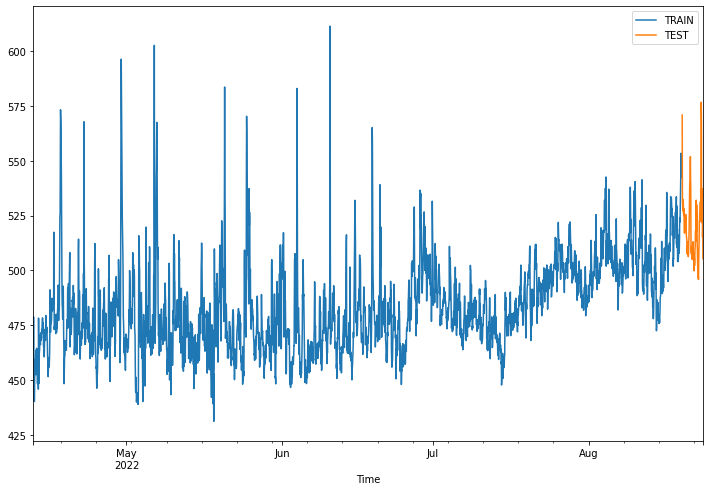

In [ ]:
train_data['CO2'].plot(legend=True,label='TRAIN')
test_data['CO2'].plot(legend=True,label='TEST',figsize=(12,8))

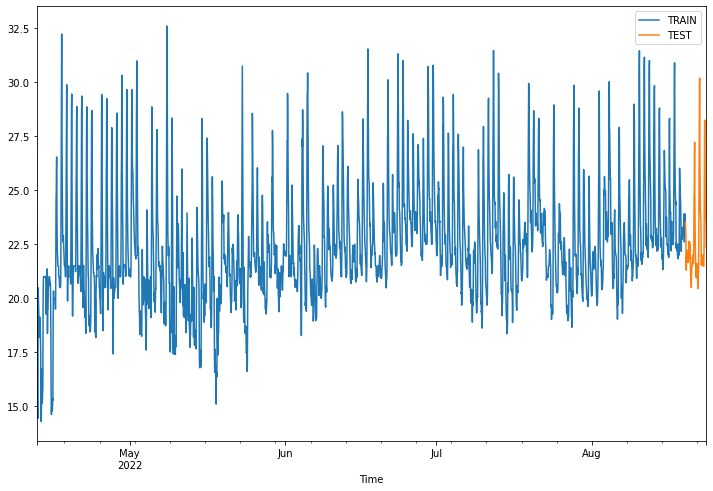

In [ ]:
train_data['TEMP'].plot(legend=True,label='TRAIN')
test_data['TEMP'].plot(legend=True,label='TEST',figsize=(12,8))

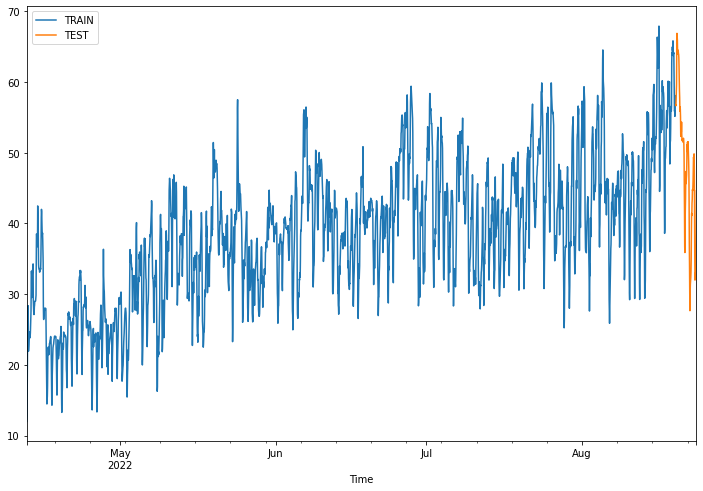

In [ ]:
train_data['HUM'].plot(legend=True,label='TRAIN')
test_data['HUM'].plot(legend=True,label='TEST',figsize=(12,8))

## HUM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train_data[['HUM','HUM']])

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train_data[['HUM','HUM']])
scaled_test = scaler.transform(test_data[['HUM','HUM']])

In [ ]:
scaled_train=scaled_train[:,0]
scaled_test = scaled_test[:,0]

In [ ]:
scaled_test


array([0.80054158, 0.79845924, 0.8137958 , 0.83416741, 0.85309571,
       0.9370444 , 0.98162748, 0.97316103, 0.96492474, 0.93411942,
       0.92881994, 0.93297359, 0.93905532, 0.93073701, 0.92881994,
       0.9202372 , 0.89686879, 0.86427861, 0.83663536, 0.81890798,
       0.78440074, 0.79560568, 0.78951292, 0.77098126, 0.72434359,
       0.72081795, 0.73236443, 0.73200085, 0.75724226, 0.72526908,
       0.71506674, 0.70995456, 0.71292932, 0.71474723, 0.71283016,
       0.70645095, 0.71314967, 0.71634479, 0.71354631, 0.70132775,
       0.67161318, 0.59508466, 0.53545394, 0.4415649 , 0.42718688,
       0.50323062, 0.53869639, 0.56392678, 0.6112255 , 0.63220676,
       0.60156304, 0.61474013, 0.62368645, 0.64937958, 0.69973019,
       0.68257124, 0.70612042, 0.70292531, 0.70036921, 0.70768492,
       0.68918631, 0.67353025, 0.65400699, 0.62879864, 0.55850611,
       0.45132652, 0.39683329, 0.32654076, 0.28011243, 0.32622124,
       0.34736409, 0.35499006, 0.36328458, 0.3769795 , 0.40609

 Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

 Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

## DEEP LEARNING

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 24 #36
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# What does the first batch look like?
X,y = generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.01492384 0.08693135 0.1945245  0.2745986  0.31713154
 0.34185879 0.2384083  0.20744133 0.21505764 0.22646923 0.23878139
 0.24927954 0.2652712  0.24624331 0.24963977 0.25146665 0.26188761
 0.28467219 0.30071531 0.32636888 0.40891313 0.44398415 0.43227666]
Predict this y: 
 [0.3660071]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [ ]:
# define model
model = Sequential()
model.add(LSTM(250, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250)               252000    
                                                                 
 dense (Dense)               (None, 1)                 251       
                                                                 
Total params: 252,251
Trainable params: 252,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit_generator(generator,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1576/1576 [==============================] - 44s 27ms/step - loss: 0.0111
Epoch 2/20
1576/1576 [==============================] - 46s 29ms/step - loss: 0.0033
Epoch 3/20
1576/1576 [==============================] - 47s 30ms/step - loss: 0.0024
Epoch 4/20
1576/1576 [==============================] - 49s 31ms/step - loss: 0.0022
Epoch 5/20
1576/1576 [==============================] - 47s 30ms/step - loss: 0.0021
Epoch 6/20
1576/1576 [==============================] - 47s 30ms/step - loss: 0.0021
Epoch 7/20
1576/1576 [==============================] - 46s 29ms/step - loss: 0.0020
Epoch 8/20
1576/1576 [==============================] - 47s 30ms/step - loss: 0.0020
Epoch 9/20
1576/1576 [==============================] - 43s 27ms/step - loss: 0.0019
Epoch 10/20
1576/1576 [==============================] - 43s 27ms/step - loss: 0.0020
Epoch 11/20
1576/1576 [==============================] - 44s 28ms/step - loss: 0.0019
Epoch 12/20
1576/1576 [==============================] - 44s 28ms/step - l

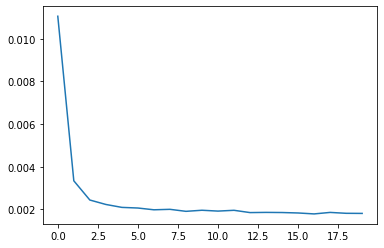

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 34ms/step


##### Inverse Transformations and Compare

In [ ]:
test=pd.DataFrame(({'HUM_1':test_predictions,
                    'HUM_2':test_predictions}))

In [ ]:
true_predictions=scaler.inverse_transform(test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


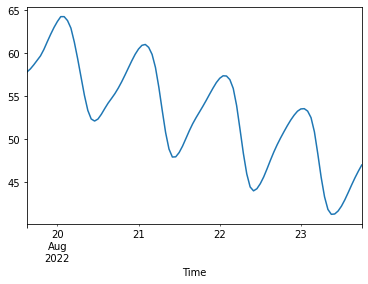

In [ ]:
test_data['HUM_Pred']=true_predictions[:,0]
test_data['HUM_Pred'].plot()


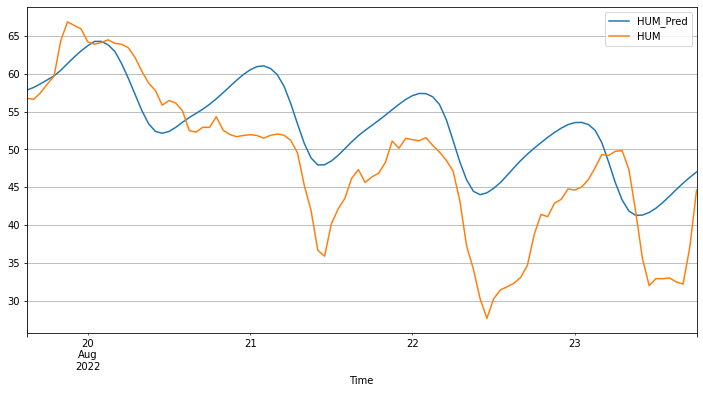

In [ ]:
test_data['HUM_Pred'].plot(legend=True,figsize=(12,6))
test_data['HUM'].plot(legend=True,figsize=(12,6))
plt.grid()
plt.savefig('hum_nn_1')

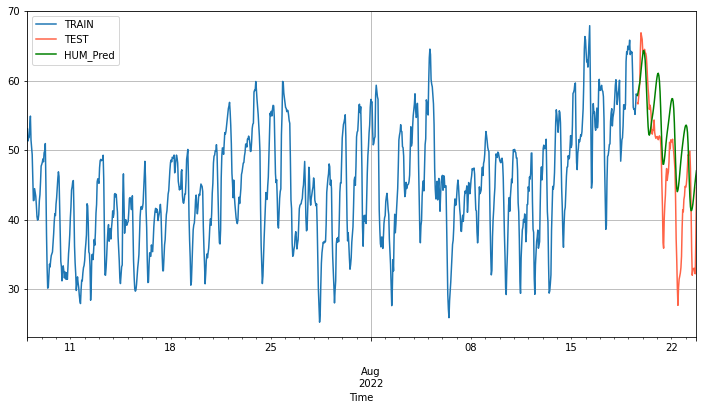

In [ ]:
train_data['HUM'].iloc[576:].plot(legend=True,label='TRAIN')
test_data['HUM'].plot(legend=True,label='TEST',figsize=(12,8),c='tomato')
test_data['HUM_Pred'].plot(legend=True,figsize=(12,6), c='green')
plt.grid()
plt.savefig('hum_nn_2')

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse,rmspe,maxabs,meanabs
#co2
def mea_stats(y,y_hat):
  error1 = mse(y, y_hat)
  error2 = rmse(y, y_hat)
  error3 = rmspe(y, y_hat)
  error4 = maxabs(y, y_hat)
  error5 = meanabs(y, y_hat)
  print(f' MSE Error: {error1:11.10}')
  print(f' RMSE Error: {error2:11.10}')
  print(f'Root Mean Squared Percentage Error:{error3:11.10}')
  print(f' maximum absolute error: {error4:11.10}')
  print(f' mean absolute Error: {error5:11.10}')

In [ ]:
mea_stats(test_data['HUM'],test_data['HUM_Pred'])

 MSE Error: 57.34503016
 RMSE Error: 7.572650141
Root Mean Squared Percentage Error:2.038925051
 maximum absolute error: 16.60047992
 mean absolute Error: 6.447096172


Stacked LSTM
Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

An LSTM layer requires a three-dimensional input and LSTMs by default will produce a two-dimensional output as an interpretation from the end of the sequence.

In [ ]:
# define model
model = Sequential()
model.add(LSTM(300, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
model.fit_generator(generator,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1576/1576 [==============================] - 72s 44ms/step - loss: 0.0134
Epoch 2/20
1576/1576 [==============================] - 70s 44ms/step - loss: 0.0031
Epoch 3/20
1576/1576 [==============================] - 70s 44ms/step - loss: 0.0027
Epoch 4/20
1576/1576 [==============================] - 70s 44ms/step - loss: 0.0024
Epoch 5/20
1576/1576 [==============================] - 70s 44ms/step - loss: 0.0025
Epoch 6/20
1576/1576 [==============================] - 70s 45ms/step - loss: 0.0023
Epoch 7/20
1576/1576 [==============================] - 70s 45ms/step - loss: 0.0023
Epoch 8/20
1576/1576 [==============================] - 69s 44ms/step - loss: 0.0023
Epoch 9/20
1576/1576 [==============================] - 70s 45ms/step - loss: 0.0021
Epoch 10/20
1576/1576 [==============================] - 71s 45ms/step - loss: 0.0021
Epoch 11/20
1576/1576 [==============================] - 70s 44ms/step - loss: 0.0021
Epoch 12/20
1576/1576 [==============================] - 72s 46ms/step - l

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 27ms/step


In [ ]:
test=pd.DataFrame(({'HUM1':test_predictions,
                    'HUM2':test_predictions}))

In [ ]:
true_predictions=scaler.inverse_transform(test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


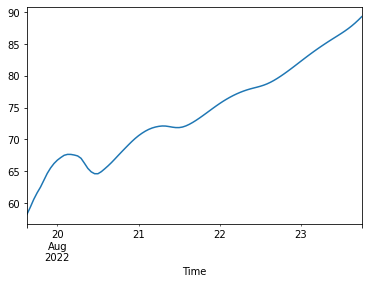

In [ ]:
test_data['HUM_Pred2']=true_predictions[:,0]
test_data['HUM_Pred2'].plot()

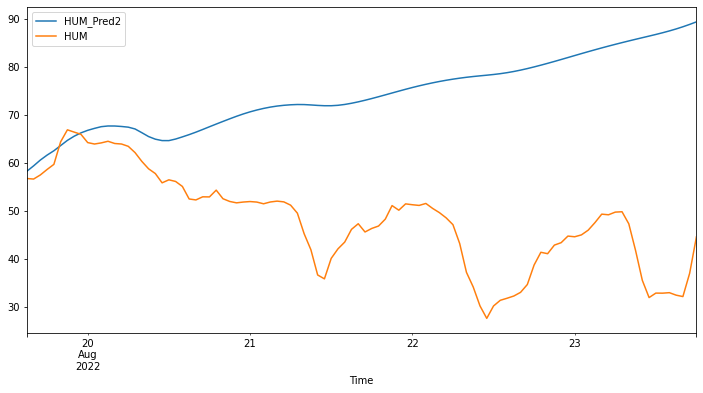

In [ ]:

test_data['HUM_Pred2'].plot(legend=True,figsize=(12,6))
test_data['HUM'].plot(legend=True,figsize=(12,6))

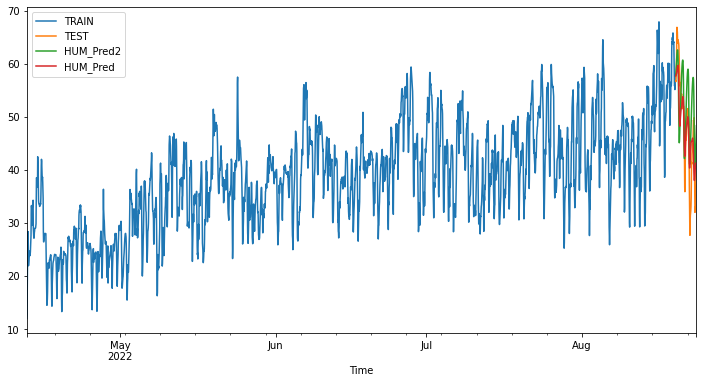

In [ ]:
train_data['HUM'].plot(legend=True,label='TRAIN')
test_data['HUM'].plot(legend=True,label='TEST',figsize=(12,8))
test_data['HUM_Pred2'].plot(legend=True,figsize=(12,6))
test_data['HUM_Pred'].plot(legend=True,figsize=(12,6))